In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from tqdm import tqdm
from transformers import AutoTokenizer

In [59]:
train_path = '../../data/train.csv'
valid_path = '../../data/dev.csv'
model_name = 'klue/roberta-base'

In [60]:
train_data = pd.read_csv(train_path)
valid_data = pd.read_csv(valid_path)

In [61]:
train_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label
4469,boostcamp-sts-v1-train-4469,nsmc-sampled,한마디로 쓰레기영화,한마디로 쓰레기 영화,5.0,1.0
4415,boostcamp-sts-v1-train-4415,slack-sampled,마지막 사진까지 심장이 남아나질 않네요..!ㅠㅠ,그러나 마지막 사진...!,1.2,0.0
8004,boostcamp-sts-v1-train-8004,nsmc-sampled,"천국에 살고 있지도, 어떤 곳인지도 모르지만 이런 아이들이 천국에 없다면 그곳은 천...",이런 일이 일반화되면 국가의 그 어느 구석에도 희망은 없다.,0.0,0.0
8214,boostcamp-sts-v1-train-8214,slack-rtt,서울오시면 오프로 뵈어요!!!,서울에 오시면 만나요!,3.6,1.0
8116,boostcamp-sts-v1-train-8116,petition-sampled,화울차 지입제도 폐지해주세요,이륜차 자동차전용도로 허용해주세요,0.0,0.0
3181,boostcamp-sts-v1-train-3181,nsmc-sampled,여태것 봤던 다큐중 최고몇회인지 기억은 확실하지 않지만 천문학을 배우면 겸손해진다고..,조선의 가장 화려했던 일간의 축제를 D로 복원한 다큐. 아이들과 함께 보면 좋을 것...,0.2,0.0
7904,boostcamp-sts-v1-train-7904,nsmc-sampled,꿈을소재로 한것도 너무 좋은거 같아요!,너무참신한소재인거같음,2.2,0.0
8370,boostcamp-sts-v1-train-8370,slack-rtt,특히나 1번이 어렵고도 중요한 것 같습니다.,특히 1번이 어렵고 중요한 것 같습니다.,4.4,1.0
4784,boostcamp-sts-v1-train-4784,nsmc-rtt,제가 스토리이해를 프로못해서 그런건진 몰라도..나중에 한번 더 봐야겠네요,제가 스토리 이해를 잘 못해서 그럴수도 있지만 나중에 다시 봐야겠네요.,4.0,1.0
8174,boostcamp-sts-v1-train-8174,petition-rtt,"국가인권정책 기본계획(NAP)반대, 난민법 폐지, 불법 체류자 추방, 국민연금 폐지...","국민인권정책기본계획 반대, 난민법 폐지, 불법체류자 추방, 국민연금 폐지, 한일군사...",4.0,1.0


In [62]:
valid_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label
58,boostcamp-sts-v1-dev-058,nsmc-rtt,제발 진짜 무한도전 ㅠ 이름처럼 계속 이어가면 좋겠어요..ㅠ,제발 진짜 무한도전이다 ㅠ 이름처럼 계속 이어졌으면 좋겠다.. ㅠ,4.4,1.0
148,boostcamp-sts-v1-dev-148,nsmc-sampled,따뜻한 미소가 너무 좋은 영화,보는 내내 순수한 느낌이 너무 좋은 영화,2.2,0.0
252,boostcamp-sts-v1-dev-252,slack-rtt,슬랙 워크플로우를 이용하면 반복 업무를 쉽게 처리할 수 있습니다.,Slack 워크플로를 사용하면 반복적인 작업을 쉽게 처리할 수 있습니다.,4.6,1.0
187,boostcamp-sts-v1-dev-187,nsmc-rtt,기타노 타케시의 연기는 정말.. 그사람을 연기한다,키타노 타케시의 연기는 정말.. 그 사람을 연기합니다.,4.6,1.0
30,boostcamp-sts-v1-dev-030,petition-sampled,국회의원을 명예직으로 전환후 기본급 조정,공무원 퇴직후 재취업시 연금 지급을 중지하거나 최소화,0.0,0.0
501,boostcamp-sts-v1-dev-501,nsmc-sampled,많은 분들이 접하지 못한 의외의 수작.,볼 게 없어서 봤는데 의외의 수작... 여운이 남는 영화,2.2,0.0
17,boostcamp-sts-v1-dev-017,slack-sampled,진짜 고기 짱맛이었습니다 ㅋㅋㅋ,역시나 짱짱이었습니다,2.6,1.0
307,boostcamp-sts-v1-dev-307,slack-rtt,주사위는 던져졌음 ㅋ,주사위가 던져진다,3.2,1.0
285,boostcamp-sts-v1-dev-285,petition-sampled,부동산 양극화 주범,정부는 책임지고 부동산 양극화 해결해주세요,1.2,0.0
379,boostcamp-sts-v1-dev-379,nsmc-sampled,아주 좋은 영화입니다.,너무 좋은 영화입니다.,4.8,1.0


In [63]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenizing_text(text):
    return tokenizer(text)['input_ids']
    

In [64]:
def preprocessing_df(df):
    df['sentence_1_tokens'] = df['sentence_1'].apply(tokenizing_text)
    df['sentence_2_tokens'] = df['sentence_2'].apply(tokenizing_text)
    return df
    


In [65]:
train_data = preprocessing_df(train_data)

In [66]:
train_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_tokens,sentence_2_tokens
4597,boostcamp-sts-v1-train-4597,nsmc-rtt,본방사수해서 보기도 힘든데!!!,생방송 보기도 힘들다!!!,3.8,1.0,"[0, 1163, 2239, 2063, 2113, 6396, 1160, 2015, ...","[0, 28814, 1160, 2015, 2119, 4390, 2062, 5, 5,..."
672,boostcamp-sts-v1-train-672,slack-sampled,어제 <PERSON> 과 오랜만에 만나 식사했습니다!!,<PERSON> 님과 어제 회식 진행했습니다~~!,1.6,0.0,"[0, 5538, 32, 21639, 2238, 18946, 34, 604, 744...","[0, 32, 21639, 2238, 18946, 34, 805, 2145, 553..."
8190,boostcamp-sts-v1-train-8190,slack-sampled,만나서 정말 반가웠습니다,오늘 만나서 정말 반가웠구요,3.8,1.0,"[0, 4026, 2112, 3944, 29837, 2219, 3606, 2]","[0, 3822, 4026, 2112, 3944, 29837, 5515, 2]"
7296,boostcamp-sts-v1-train-7296,slack-sampled,ㅋㅋ오늘도 아침부터 손목 스트레칭 갑늬드아~,벌써 기대됩니드아~~,0.0,0.0,"[0, 3725, 2168, 2396, 2119, 4408, 3797, 10818,...","[0, 5442, 3869, 3598, 2209, 2343, 2227, 97, 97..."
7746,boostcamp-sts-v1-train-7746,nsmc-sampled,진짜 이렇게 재미없을수가,진짜 재미없다 ㅋㅋ,4.0,1.0,"[0, 4229, 3737, 19113, 2069, 2113, 2116, 2]","[0, 4229, 19113, 2062, 3725, 2]"
5805,boostcamp-sts-v1-train-5805,nsmc-rtt,결말은 살짝아쉬웠지만 개인적으로 아주 만족!!,결말이 조금 아쉬웠지만 개인적으로 매우 만족!!,4.4,1.0,"[0, 13489, 2073, 6693, 2227, 2893, 2385, 3683,...","[0, 13489, 2052, 4027, 15234, 3683, 3907, 1118..."
4612,boostcamp-sts-v1-train-4612,slack-rtt,이야기하면서 놀랐던 포인트는 'Upstage'의 비전과 가치를 빼놓을 수 없을 것 ...,이야기하면서 놀랐던 점은 '업스테이지'의 비전과 가치였다.,3.4,1.0,"[0, 3758, 5643, 2112, 8179, 2414, 4648, 2259, ...","[0, 3758, 5643, 2112, 8179, 2414, 1540, 2073, ..."
352,boostcamp-sts-v1-train-352,petition-rtt,책임지는 사람이 없네요,아무도 책임이 없다,0.8,0.0,"[0, 9136, 2259, 3611, 2052, 1415, 2203, 2182, 2]","[0, 3795, 2119, 3998, 2052, 1415, 2062, 2]"
2607,boostcamp-sts-v1-train-2607,nsmc-sampled,요즘 나오는 공포물보다 훨씬 볼만함,요즘 나오는 왠만한 액션 영화보다 재밌다,1.2,0.0,"[0, 4442, 3853, 2259, 5892, 2266, 2178, 2062, ...","[0, 4442, 3853, 2259, 1461, 2154, 2470, 8765, ..."
9029,boostcamp-sts-v1-train-9029,petition-rtt,삼성 공화국을 해체시켜 주십시오.,삼성공화국을 해체하라.,4.0,1.0,"[0, 3840, 8932, 2069, 8033, 2067, 2621, 1564, ...","[0, 3840, 27771, 2069, 8033, 16599, 18, 2]"


In [67]:
train_data.isna().sum()

id                   0
source               0
sentence_1           0
sentence_2           0
label                0
binary-label         0
sentence_1_tokens    0
sentence_2_tokens    0
dtype: int64

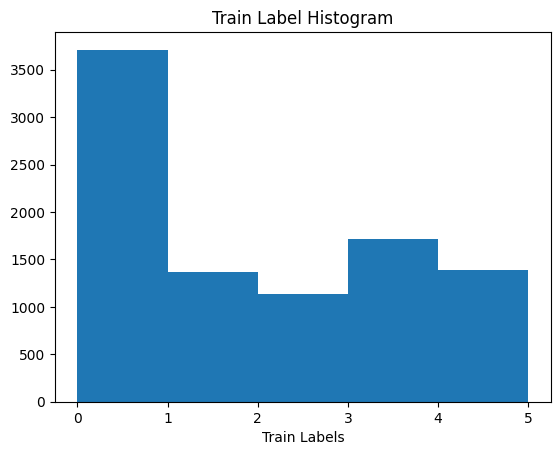

In [68]:
plt.hist(train_data['label'], bins=5)
plt.title('Train Label Histogram')
plt.xlabel('Train Labels')
plt.show()

In [69]:
print(f"전체 개수: {len(train_data)}")
print(f"label이 0.0 개수: {(train_data['label']==0.0).sum()}")

전체 개수: 9324
label이 0.0 개수: 2119


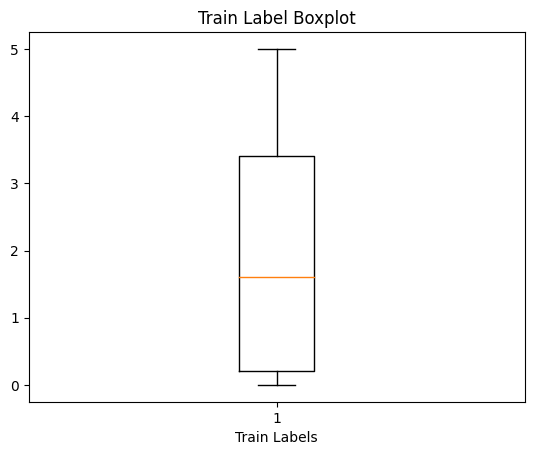

In [70]:
plt.boxplot(train_data['label'])
plt.title('Train Label Boxplot')
plt.xlabel('Train Labels')
plt.show()

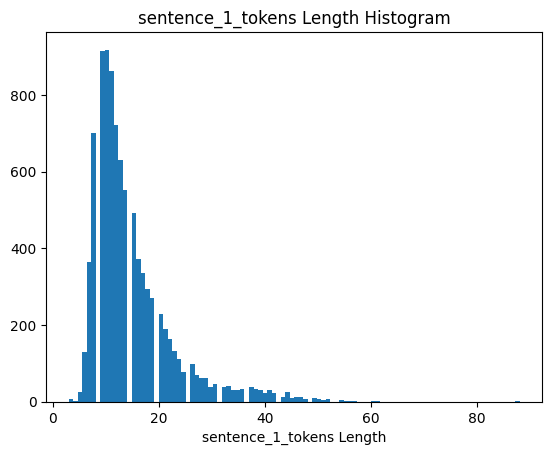

In [71]:
plt.hist(train_data['sentence_1_tokens'].apply(len), bins=100)
plt.title('sentence_1_tokens Length Histogram')
plt.xlabel('sentence_1_tokens Length')
plt.show()

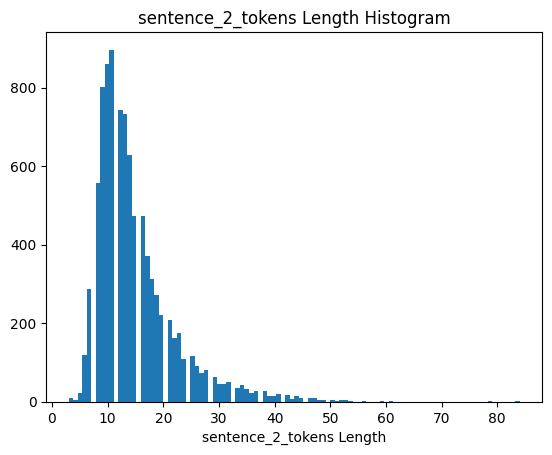

In [72]:
plt.hist(train_data['sentence_2_tokens'].apply(len), bins=100)
plt.title('sentence_2_tokens Length Histogram')
plt.xlabel('sentence_2_tokens Length')
plt.show()

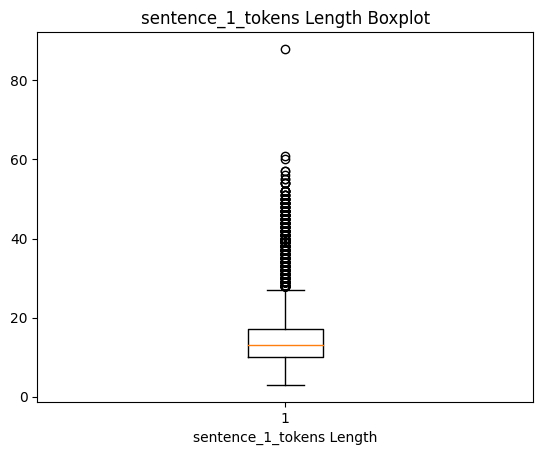

In [73]:
plt.boxplot(train_data['sentence_1_tokens'].apply(len))
plt.title('sentence_1_tokens Length Boxplot')
plt.xlabel('sentence_1_tokens Length')
plt.show()

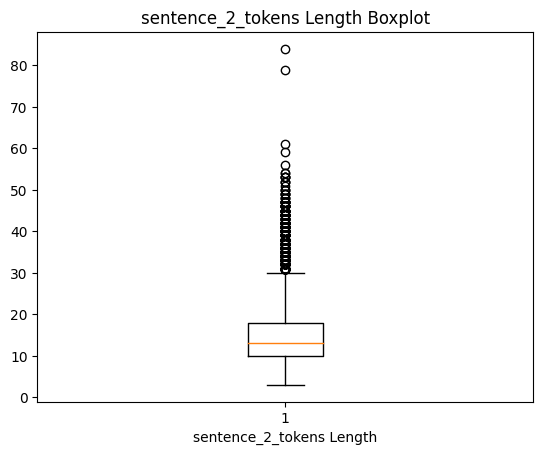

In [74]:
plt.boxplot(train_data['sentence_2_tokens'].apply(len))
plt.title('sentence_2_tokens Length Boxplot')
plt.xlabel('sentence_2_tokens Length')
plt.show()

In [75]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x): 
    x = pattern.sub(' ', x)
    x = emoji.replace_emoji(x, replace='') #emoji 삭제
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)

    return x

In [76]:
train_data['sentence_1'] = train_data['sentence_1'].apply(clean)
train_data['sentence_2'] = train_data['sentence_2'].apply(clean)
train_data = preprocessing_df(train_data)

In [84]:
train_data.sample(10)

,id,source,sentence_1,sentence_2,label,binary-label,sentence_1_tokens,sentence_2_tokens
5296,boostcamp-sts-v1-train-5296,nsmc-sampled,영화뿐만아니라 실제로도 일어날수있다고생각하니 오싹하고 무섭다.,영화뿐만 아니라 그의 인생은 진정한 해피엔딩이었다.,0.8,0.0,"[0, 3771, 2782, 2154, 2227, 2209, 2181, 4539, ...","[0, 3771, 2782, 2154, 3614, 2181, 636, 2079, 4..."
7840,boostcamp-sts-v1-train-7840,slack-sampled,네 충전 진행하겠습니다!,앗 네! 추가하겠습니다!,0.0,0.0,"[0, 752, 7481, 3750, 2205, 2918, 2219, 3606, 5...","[0, 1385, 752, 5, 4140, 2205, 2918, 2219, 3606..."
3527,boostcamp-sts-v1-train-3527,slack-sampled,9번째 <PERSON> 님과 (어제)처음으로 이야기 나누어보았습니다ㅎㅎ,내일 <PERSON> 님과 저녁에 강남-양재 부근에서 번개가 있습니다. (주제는 회...,0.4,0.0,"[0, 29, 2517, 3135, 32, 21639, 2238, 18946, 34...","[0, 5420, 32, 21639, 2238, 18946, 34, 805, 214..."
9172,boostcamp-sts-v1-train-9172,nsmc-sampled,사람손가락이 이렇게 무서운겁니다,산이 이렇게 위험합니다,0.0,0.0,"[0, 3611, 21012, 2052, 3737, 8558, 2824, 3606, 2]","[0, 1235, 2052, 3737, 4253, 11800, 2]"
4110,boostcamp-sts-v1-train-4110,slack-sampled,저기 용호낙지 맛있어요,소금구이 맛있어요 ㅎㅎ,1.2,0.0,"[0, 7069, 30219, 2921, 2118, 4550, 10283, 2]","[0, 7691, 19125, 4550, 10283, 5311, 2]"
7091,boostcamp-sts-v1-train-7091,nsmc-sampled,뭐 어쩌라고....,"뭐 별로,, 그냥 그래..",0.6,0.0,"[0, 1097, 5397, 7245, 18, 18, 18, 18, 2]","[0, 1097, 5429, 16, 16, 4181, 3672, 18, 18, 2]"
7642,boostcamp-sts-v1-train-7642,slack-rtt,이거 틀어놓고 점심 먹습니다!,이것을 켜고 점심을 먹으십시오!,3.2,1.0,"[0, 4647, 16814, 2850, 2088, 5961, 1059, 2219,...","[0, 3982, 2069, 1723, 2088, 5961, 2069, 1059, ..."
5237,boostcamp-sts-v1-train-5237,nsmc-rtt,"배경이 너무 이뻐..,,",배경이 너무 예쁘다...,4.4,1.0,"[0, 5118, 2052, 3760, 21690, 18, 18, 16, 16, 2]","[0, 5118, 2052, 3760, 7693, 2062, 18, 18, 18, 2]"
444,boostcamp-sts-v1-train-444,slack-sampled,그리고 연달아 회의 세시간..!ㅋㅋㅋ이 기다리고 있군요!,냥이 8시간 보는법.,0.0,0.0,"[0, 3673, 17373, 2227, 4011, 1269, 8964, 18, 1...","[0, 742, 2052, 28, 8964, 1160, 2259, 2520, 18, 2]"
4771,boostcamp-sts-v1-train-4771,slack-sampled,워크샵 영상 편집하다가 공유하고 싶은 포인트가 있어 공유합니다,드디어! 워크샵 영상이 완성되었어요,1.2,0.0,"[0, 7809, 3284, 4729, 6112, 2205, 4795, 5194, ...","[0, 7310, 5, 7809, 3284, 4729, 2052, 4976, 249..."


In [87]:
train_data[['sentence_1','sentence_1']].apply(clean)

TypeError: expected string or bytes-like object